<a href="https://colab.research.google.com/github/DATA3750/WeeklyDemo/blob/main/Wk8_PCA_TextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA Technique and TextBLob Package

## Outline

___________
* [PCA](#PCA)
* [Iris Example](#Iris-Example)
* [Handwritten Digit Example](#Handwritten-Digit-Example)
* [PCA at Risk?](#PCA-at-Risk?)
* [The textBlob Library](#The-textBlob-Library)


## PCA
___

PCA stands for Principal Component Analysis. It is a widely used dimensionality reduction technique in machine learning and statistics. The goal of PCA is to reduce the dimensionality of a dataset by projecting it onto a lower-dimensional subspace, while retaining as much of the information in the data as possible.

PCA works by finding the directions (principal components) in the data that capture the most variance. These principal components are linear combinations of the original features, and are orthogonal to each other (i.e., they are uncorrelated). The first principal component captures the most variance in the data, the second principal component captures the second most variance (subject to the constraint that it is orthogonal to the first), and so on.

Once the principal components are found, we can project the original data onto a lower-dimensional subspace spanned by the top k principal components, where k is the desired number of dimensions. This produces a new dataset with k features, which can be used for further analysis or visualization.

>PCA has many applications, including data visualization, feature extraction, and data compression. By reducing the dimensionality of the data, PCA can help us better understand the underlying structure of the data, identify important features, and improve the efficiency of machine learning algorithms.

## Iris Example
___

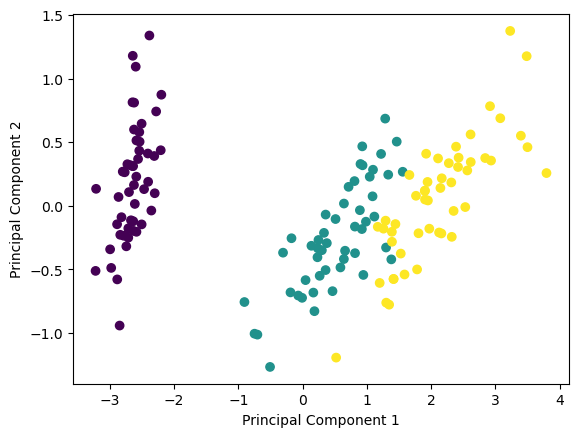

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the results using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In this plot, each point represents an iris sample, with the x-axis and y-axis representing the first and second principal components, respectively. The points are colored based on the class labels: blue for setosa, orange for versicolor, and green for virginica. We can see that the three classes are well separated in the transformed space, indicating that PCA was able to capture the most important information in the original dataset.

The scatter plot should show a clear separation between the three classes of iris flowers, indicating that PCA was successful in reducing the dimensionality of the dataset while preserving the underlying structure of the data.

In [ ]:
print(pca.explained_variance_ratio_)


[0.92461872 0.05306648]


The first principal component explains 92.46% of the variance in the data, while the second principal component explains an additional 5.31%. This means that the first two principal components together capture over 97% of the total variance in the dataset, which suggests that we can safely reduce the dimensionality of the dataset from four to two while preserving most of the information.

## Handwritten Digit Example
___

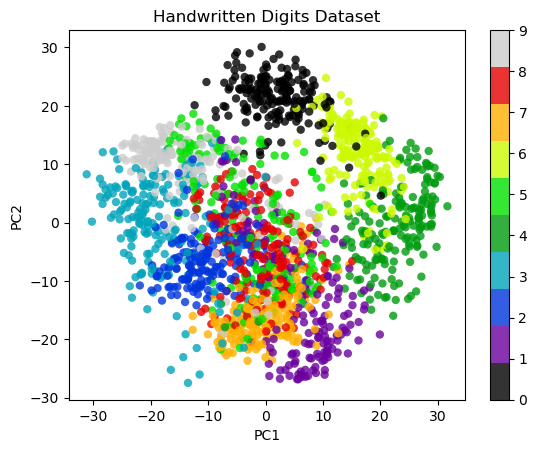

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the results using a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Handwritten Digits Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In this plot, each point represents a digit, with the x-axis and y-axis representing the first and second principal components, respectively. The points are colored based on their labels (0-9). We can see that the digits are somewhat clustered together by label, indicating that there is some structure in the data that can be captured by PCA.

In [ ]:
print(pca.explained_variance_ratio_)


[0.14890594 0.13618771]


The first principal component explains 14.89% of the variance in the data, while the second principal component explains an additional 13.62%. This means that the first two principal components together capture around 28.51% of the total variance in the dataset, which suggests that we might need more than two components to capture most of the important information in this dataset.

## PCA at Risk?
___

**PCA Raises Red Flags**

Principal component analysis is a key machine learning technique for reducing the number of dimensions in a dataset, but new research shows that its output can be inconsistent and unreliable.

<u>What’s new:</u> Eran Elhaik at Lund University assessed the use of principal component analysis (PCA) in population genetics, the study of patterns in DNA among large groups of people. Working with synthetic and real-world datasets, he showed that using PCA on substantially similar datasets can produce contradictory results.

<u>Key insight:</u> PCA has characteristics that prior research proposed as risk factors for unreproducible scientific research. For instance, it tends to be used to generate hypotheses, accommodates flexible experimental designs that can lead to bias, and is used so frequently — in population genetics, at least — that many conclusions are likely to be invalid on a statistical basis alone. Studies of population genetics use PCA to reduce the dimensions of raw genetic data and cluster the reduced data to find patterns. For example, some studies assume that the closer different populations are clustered, the more likely they share a common geographical origin. If PCA alters the clusters in response to minor changes in the input, then the analysis doesn’t necessarily reflect genetic relationships.



 

>One of the main issues with PCA is that its output can be sensitive to the scaling of the input features. In particular, if some features are on a much larger scale than others, they can dominate the analysis and lead to misleading results. To address this, it is common practice to standardize the data prior to performing PCA, but even then, care must be taken to ensure that the results are interpretable and meaningful.

>Another issue with PCA is that its output can be inconsistent and unreliable if the data does not follow a linear structure. In particular, if there are non-linear relationships or interactions among the input features, PCA may not be able to capture them effectively, leading to suboptimal results. In such cases, alternative techniques such as kernel PCA or non-linear dimensionality reduction may be more appropriate.

Finally, it's worth noting that PCA is not a panacea and should not be applied blindly to all datasets. Its effectiveness depends on the specific characteristics of the data and the goals of the analysis, and it should be used in conjunction with other techniques and domain expertise to gain a comprehensive understanding of the underlying patterns and relationships in the data.

## The textBlob Library
___

The polarity score ranges from -1 (most negative) to 1 (most positive), while the subjectivity score ranges from 0 (most objective) to 1 (most subjective).

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob
TextBlob("I love NLP").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:
from textblob import TextBlob
TextBlob("great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [ ]:
from textblob import TextBlob
TextBlob("not great").sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [ ]:
from textblob import TextBlob
TextBlob("very great").sentiment

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)

In [ ]:
from textblob import TextBlob
TextBlob("I am miserable").sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

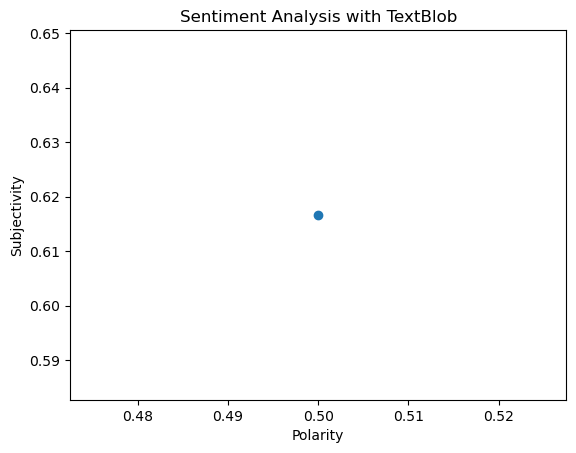

In [ ]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Define some sample text
text = "I love Python. It's such a great language!"

# Create a TextBlob object and get the polarity and subjectivity scores
blob = TextBlob(text)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Plot the sentiment on a scatter plot
plt.scatter(polarity, subjectivity)

# Add labels and title to the plot
plt.title("Sentiment Analysis with TextBlob")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

# Show the plot
plt.show()


In [ ]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
import urllib.request

# Load the text data
url = 'https://www.gutenberg.org/files/11/11-0.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('utf-8-sig')

# Create a TextBlob object
blob = TextBlob(data)

# Print the sentiment polarity and subjectivity
print("Sentiment Polarity: ", blob.sentiment.polarity)
print("Sentiment Subjectivity: ", blob.sentiment.subjectivity)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DONGY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment Polarity:  0.04661963211672422
Sentiment Subjectivity:  0.4890285073041835


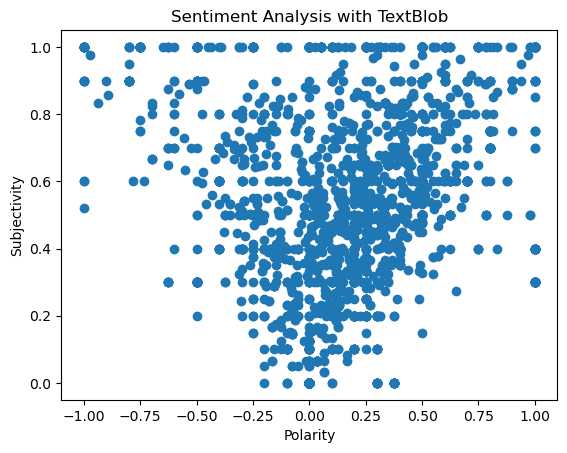

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

# Load the sample data from a CSV file
df = pd.read_csv('https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv')

# Create a list of TextBlob objects from the 'TweetText' column
blobs = [TextBlob(tweet) for tweet in df['TweetText']]

# Create a list of polarity and subjectivity scores from the TextBlob objects
polarity = [blob.sentiment.polarity for blob in blobs]
subjectivity = [blob.sentiment.subjectivity for blob in blobs]

# Plot the sentiment on a scatter plot
plt.scatter(polarity, subjectivity)

# Add labels and title to the plot
plt.title("Sentiment Analysis with TextBlob")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

# Show the plot
plt.show()


The polarity score ranges from -1 (most negative) to 1 (most positive), while the subjectivity score ranges from 0 (most objective) to 1 (most subjective). Therefore, the scatter plot will show how positive/negative and subjective/objective the sentiment of the tweets is.

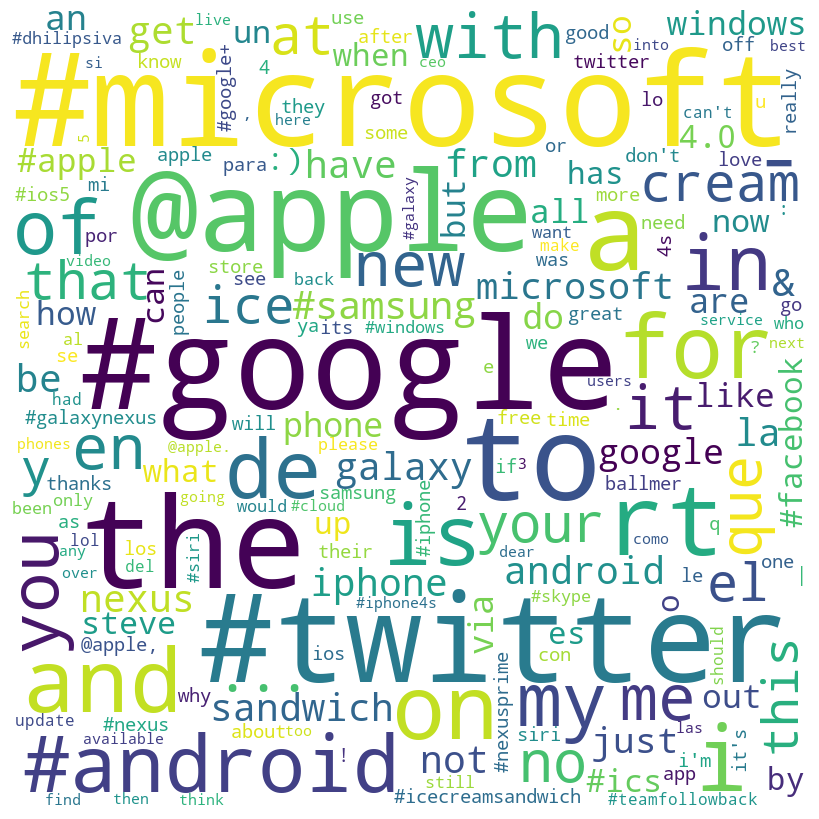

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# load the Twitter corpus
data = pd.read_csv('https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv')

# preprocess the text data and create a list of words
words = []
for tweet in data['TweetText']:
    for word in tweet.split():
        words.append(word.lower())

# create a word frequency count using Counter object
word_freq = Counter(words)

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, 
                background_color='white', 
                stopwords=stopwords, 
                min_font_size=10).generate_from_frequencies(word_freq)
  
# plot the WordCloud image                        
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show() 
